# Pseudotime Plots

UMAP colored by pseudotime.

Inputs:
1. metadata.tsv for ATAC
2. Pseudotime values.

In [15]:
library(ggplot2)
library(scattermore)
library(scales)

### Metadata

In [4]:
# Metadata file from previous run
# should contain, sample_barcode as rowname, sample, umap1, umap2, cluster
metaData = read.table("../../analysis/20200206_pmat_snapATAC/sessions/20210717_n62599/metadata.tsv", header = T)
rownames(metaData) = paste(metaData$sample, metaData$barcode, sep='_')
metaData$cells = rownames(metaData) # for cicero
dim(metaData)
head(metaData, 5)

[1] 62599     6

,barcode,sample,umap1,umap2,cluster,cells
,<fct>,<fct>,<dbl>,<dbl>,<int>,<chr>
D0_AAACACGCTAGTACGG,AAACACGCTAGTACGG,D0,-1.8037916,-9.507773,1,D0_AAACACGCTAGTACGG
D0_AAACACGCTCTTCAAG,AAACACGCTCTTCAAG,D0,0.7074551,-9.406457,1,D0_AAACACGCTCTTCAAG
D0_AAACACGCTGATCCAT,AAACACGCTGATCCAT,D0,-2.9559933,-7.641148,1,D0_AAACACGCTGATCCAT
D0_AAACCCTGACCGCTAG,AAACCCTGACCGCTAG,D0,-3.6119107,-8.443144,1,D0_AAACCCTGACCGCTAG
D0_AAACCCTGATTGCAGT,AAACCCTGATTGCAGT,D0,0.5002119,-8.759449,3,D0_AAACCCTGATTGCAGT


### Pseudotime 

In [5]:
pseudotime = read.table("../../analysis/20200217_trajectory/sessions/20211003_n62599/pseudotime.tsv")
rownames(pseudotime) = pseudotime$sample_barcode
pseudotime$sample_barcode = NULL
all(rownames(pseudotime) == rownames(metaData))
head(pseudotime)

[1] TRUE

,dpt_pseudotime_fibr,dpt_pseudotime_high_OSK
,<dbl>,<dbl>
D0_AAACACGCTAGTACGG,0.00000000,0.8747373
D0_AAACACGCTCTTCAAG,0.03884950,0.8782327
D0_AAACACGCTGATCCAT,0.10171443,0.8466607
D0_AAACCCTGACCGCTAG,0.09229346,0.8495939
D0_AAACCCTGATTGCAGT,0.05027944,0.8626735
D0_AAACCGTACACACCTA,0.03454594,0.8612965


In [7]:
all(rownames(pseudotime)==rownames(metaData))

[1] TRUE

## Plot

In [27]:
plot_dimred <- function(x, y, col, dimred="UMAP", subset=NULL, sz=0.5, alpha=1) {
    plot_df <- data.frame(x=x, y=y,
                 cluster=col)
    plot_df = plot_df[sample(dim(plot_df)[1]), ]
    
    if (!is.null(subset)) {
        plot_df = plot_df[plot_df$cluster==subset, ]
    }
    
    ggplot(plot_df) +
    geom_scattermore(pointsize=sz, aes(x=x , y=y, col=cluster), alpha=alpha, pixels=c(5000,5000)) +
    theme_classic() +
    scale_color_viridis_c(limit=quantile(col, c(.02,.98)), 
                          oob = squish, name='Pseudotime',
                         option="A") +
    xlab(sprintf("%s 1", dimred)) + ylab(sprintf("%s 2", dimred)) +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    coord_fixed()
}

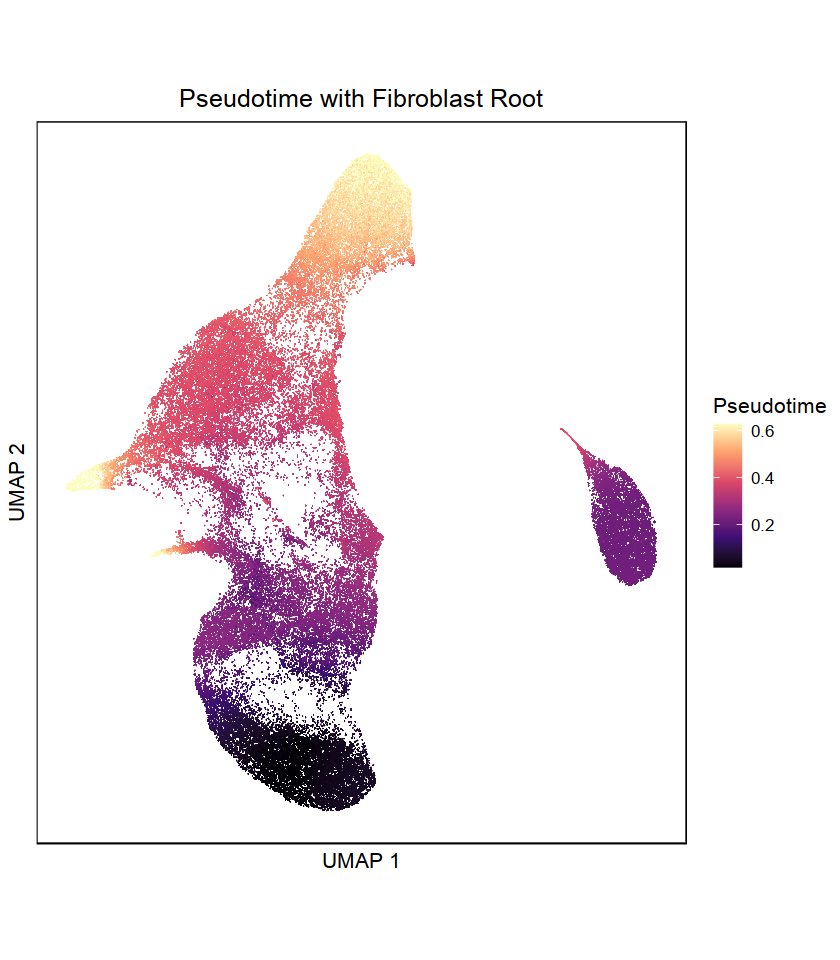

In [31]:
options(repr.plot.width = 7, repr.plot.height = 8)

plot_dimred(metaData$umap1,
            metaData$umap2,
            pseudotime$dpt_pseudotime_fibr,
           sz=6.5) +
ggtitle("Pseudotime with Fibroblast Root")

In [33]:
ggsave(file=sprintf("./subfigs/%s_pseudotime_fibr_root.pdf",
                    format(Sys.Date(), "%Y%m%d")),
       height=8, width=7)

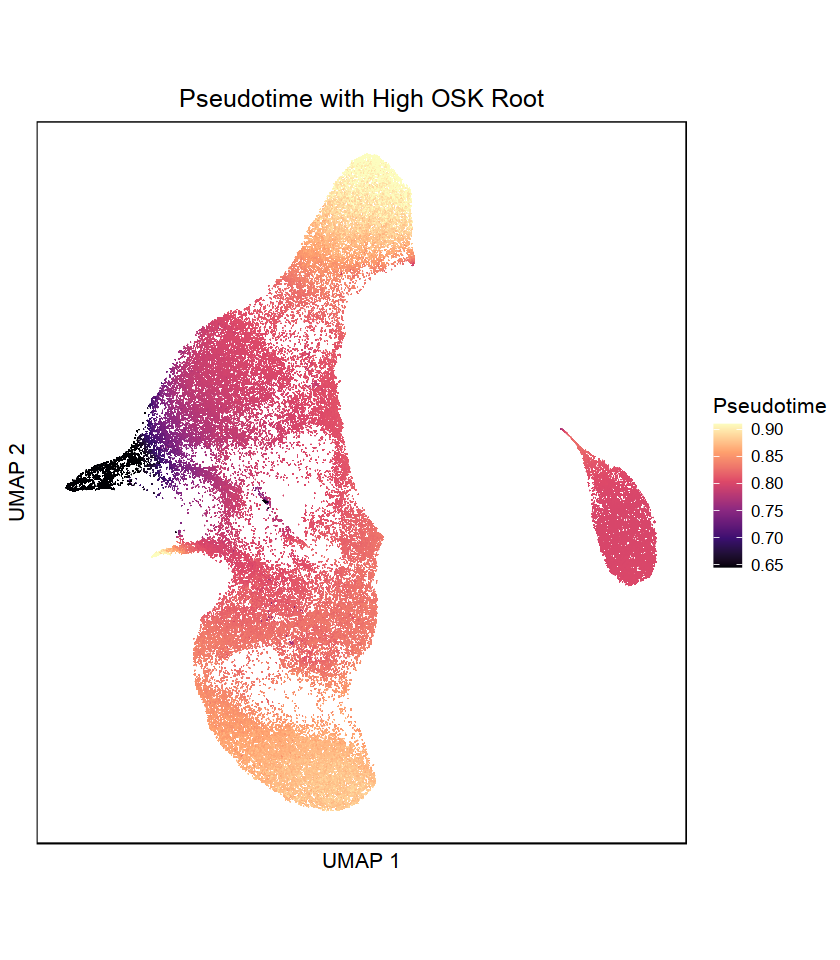

In [34]:
options(repr.plot.width = 7, repr.plot.height = 8)

plot_dimred(metaData$umap1,
            metaData$umap2,
            pseudotime$dpt_pseudotime_high_OSK,
           sz=6.5) +
ggtitle("Pseudotime with High OSK Root")

In [35]:
ggsave(file=sprintf("./subfigs/%s_pseudotime_high_OSK_root.pdf",
                    format(Sys.Date(), "%Y%m%d")),
       height=8, width=7)

---

In [36]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scales_1.1.0    scattermore_0.7 ggplot2_3.3.3  

loaded via a namespace (and not attached):
 [1] magrittr_1.5      tidyselect_1.1.0  munsell_0.5.0     uuid_0.1-4       
 [5] viridisLite_0.3.0 colorspace_1.4-1  R6_2.4.1          rlang_0.4.11     
 [9] dplyr_1.0.2       tools_3.6.3       grid_3.6